In [ ]:
!pip install ta
!pip install pyts

  Created wheel for ta: filename=ta-0.7.0-py3-none-any.whl size=28718 sha256=6bc9f8288499ecec38e9fb67b9095c0ccf8e4ebce7ad1d3f6a7fe67fe342c832
  Stored in directory: /root/.cache/pip/wheels/5e/74/e0/72395003bd1d3c8f3f5860c2d180ff15699e47a2733d8ebd38
Successfully built ta
     |████████████████████████████████| 2.5 MB 38.5 MB/s 


In [ ]:
import pandas as pd
import numpy as np
from ta import add_all_ta_features
from PIL import Image 
from sklearn.model_selection import train_test_split
from sklearn.decomposition import KernelPCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest, chi2
from collections import Counter
import cv2
from pyts.image import GramianAngularField
from pyts.image import MarkovTransitionField
import matplotlib.pyplot as plt
import  math

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [ ]:
ROOT_PATH = "/content/gdrive/MyDrive/projectAI/"
RAW_DATASET_PATH = "/content/gdrive/MyDrive/projectAI/bajajFinanceRaw.csv"
PREPROCESSED_TA_DATASET_PATH = "/content/gdrive/MyDrive/projectAI/bajajFinancePreprocessedTA.csv"
PREPROCESSED_PCA_DATASET_PATH = "/content/gdrive/MyDrive/projectAI/bajajFinancePreprocessedPCA.csv"

WINDOW_SIZE = 1

PATH_MID_PRICE = ROOT_PATH + "midPrice"
PATH_CLOSE_PRICE = ROOT_PATH + "closePrice"

PATH_MID_TA_LABEL1 = PATH_MID_PRICE + "/taNormalizedData/labelingStrategy1/"
PATH_MID_TA_LABEL2 = PATH_MID_PRICE + "/taNormalizedData/labelingStrategy2/"

PATH_CLOSE_TA_LABEL1 = PATH_CLOSE_PRICE + "taNormalizedData/labelingStrategy1/"
PATH_CLOSE_TA_LABEL2 = PATH_CLOSE_PRICE + "taNormalizedData/labelingStrategy2/"

PATH_MID_PCA_LABEL1 = PATH_MID_PRICE + "pcaNormalizedData/labelingStrategy1/"
PATH_MID_PCA_LABEL2 = PATH_MID_PRICE + "pcaNormalizedData/labelingStrategy2/"

PATH_CLOSE_PCA_LABEL1 = PATH_CLOSE_PRICE + "pcaNormalizedData/labelingStrategy1/"
PATH_CLOSE_PCA_LABEL2 = PATH_CLOSE_PRICE + "pcaNormalizedData/labelingStrategy2/"

PATH_MID_KBEST_LABEL1 = PATH_MID_PRICE + "kBestTaNormalizedData/labelingStrategy1/"
PATH_MID_KBEST_LABEL2 = PATH_MID_PRICE + "kBestTaNormalizedData/labelingStrategy2/"

PATH_CLOSE_KBEST_LABEL1 = PATH_CLOSE_PRICE + "kBestTaNormalizedData/labelingStrategy1/"
PATH_CLOSE_KBEST_LABEL2 = PATH_CLOSE_PRICE + "kBestTaNormalizedData/labelingStrategy2/"

PATH_MID_TA_LABEL1_GAF_TRAIN = PATH_MID_TA_LABEL1 + "gafImages/Train"
PATH_MID_TA_LABEL1_GAF_TEST = PATH_MID_TA_LABEL1 + "gafImages/Test"
PATH_MID_TA_LABEL1_MTF_TRAIN = PATH_MID_TA_LABEL1 + "mtfImages/Train"
PATH_MID_TA_LABEL1_MTF_TEST = PATH_MID_TA_LABEL1 + "mtfImages/Test"
PATH_MID_TA_LABEL1_NORMAL_TRAIN = PATH_MID_TA_LABEL1 + "normalImages/Train"
PATH_MID_TA_LABEL1_NORMAL_TEST = PATH_MID_TA_LABEL1 + "normalImages/Test"

PATH_MID_TA_LABEL2_GAF_TRAIN = PATH_MID_TA_LABEL2 + "gafImages/Train"
PATH_MID_TA_LABEL2_GAF_TEST = PATH_MID_TA_LABEL2 + "gafImages/Test"
PATH_MID_TA_LABEL2_MTF_TRAIN = PATH_MID_TA_LABEL2 + "mtfImages/Train"
PATH_MID_TA_LABEL2_MTF_TEST = PATH_MID_TA_LABEL2 + "mtfImages/Test"
PATH_MID_TA_LABEL2_NORMAL_TRAIN = PATH_MID_TA_LABEL2 + "normalImages/Train"
PATH_MID_TA_LABEL2_NORMAL_TEST = PATH_MID_TA_LABEL2 + "normalImages/Test"

PATH_MID_PCA_LABEL1_GAF_TRAIN = PATH_MID_PCA_LABEL1 + "gafImages/Train"
PATH_MID_PCA_LABEL1_GAF_TEST = PATH_MID_PCA_LABEL1 + "gafImages/Test"
PATH_MID_PCA_LABEL1_MTF_TRAIN = PATH_MID_PCA_LABEL1 + "mtfImages/Train"
PATH_MID_PCA_LABEL1_MTF_TEST = PATH_MID_PCA_LABEL1 + "mtfImages/Test"
PATH_MID_PCA_LABEL1_NORMAL_TRAIN = PATH_MID_PCA_LABEL1 + "normalImages/Train"
PATH_MID_PCA_LABEL1_NORMAL_TEST = PATH_MID_PCA_LABEL1 + "normalImages/Test"

PATH_MID_PCA_LABEL2_GAF_TRAIN = PATH_MID_PCA_LABEL2 + "gafImages/Train"
PATH_MID_PCA_LABEL2_GAF_TEST = PATH_MID_PCA_LABEL2 + "gafImages/Test"
PATH_MID_PCA_LABEL2_MTF_TRAIN = PATH_MID_PCA_LABEL2 + "mtfImages/Train"
PATH_MID_PCA_LABEL2_MTF_TEST = PATH_MID_PCA_LABEL2 + "mtfImages/Test"
PATH_MID_PCA_LABEL2_NORMAL_TRAIN = PATH_MID_PCA_LABEL2 + "normalImages/Train"
PATH_MID_PCA_LABEL2_NORMAL_TEST = PATH_MID_PCA_LABEL2 + "normalImages/Test"

PATH_MID_KBEST_LABEL1_GAF_TRAIN = PATH_MID_KBEST_LABEL1 + "gafImages/Train"
PATH_MID_KBEST_LABEL1_GAF_TEST = PATH_MID_KBEST_LABEL1 + "gafImages/Test"
PATH_MID_KBEST_LABEL1_MTF_TRAIN = PATH_MID_KBEST_LABEL1 + "mtfImages/Train"
PATH_MID_KBEST_LABEL1_MTF_TEST = PATH_MID_KBEST_LABEL1 + "mtfImages/Test"
PATH_MID_KBEST_LABEL1_NORMAL_TRAIN = PATH_MID_KBEST_LABEL1 + "normalImages/Train"
PATH_MID_KBEST_LABEL1_NORMAL_TEST = PATH_MID_KBEST_LABEL1 + "normalImages/Test"

PATH_MID_KBEST_LABEL2_GAF_TRAIN = PATH_MID_KBEST_LABEL2 + "gafImages/Train"
PATH_MID_KBEST_LABEL2_GAF_TEST = PATH_MID_KBEST_LABEL2 + "gafImages/Test"
PATH_MID_KBEST_LABEL2_MTF_TRAIN = PATH_MID_KBEST_LABEL2 + "mtfImages/Train"
PATH_MID_KBEST_LABEL2_MTF_TEST = PATH_MID_KBEST_LABEL2 + "mtfImages/Test"
PATH_MID_KBEST_LABEL2_NORMAL_TRAIN = PATH_MID_KBEST_LABEL2 + "normalImages/Train"
PATH_MID_KBEST_LABEL2_NORMAL_TEST = PATH_MID_KBEST_LABEL2 + "normalImages/Test"

PATH_CLOSE_TA_LABEL1_GAF_TRAIN = PATH_CLOSE_TA_LABEL1 + "gafImages/Train"
PATH_CLOSE_TA_LABEL1_GAF_TEST = PATH_CLOSE_TA_LABEL1 + "gafImages/Test"
PATH_CLOSE_TA_LABEL1_MTF_TRAIN = PATH_CLOSE_TA_LABEL1 + "mtfImages/Train"
PATH_CLOSE_TA_LABEL1_MTF_TEST = PATH_CLOSE_TA_LABEL1 + "mtfImages/Test"
PATH_CLOSE_TA_LABEL1_NORMAL_TRAIN = PATH_CLOSE_TA_LABEL1 + "normalImages/Train"
PATH_CLOSE_TA_LABEL1_NORMAL_TEST = PATH_CLOSE_TA_LABEL1 + "normalImages/Test"

PATH_CLOSE_TA_LABEL2_GAF_TRAIN = PATH_CLOSE_TA_LABEL2 + "gafImages/Train"
PATH_CLOSE_TA_LABEL2_GAF_TEST = PATH_CLOSE_TA_LABEL2 + "gafImages/Test"
PATH_CLOSE_TA_LABEL2_MTF_TRAIN = PATH_CLOSE_TA_LABEL2 + "mtfImages/Train"
PATH_CLOSE_TA_LABEL2_MTF_TEST = PATH_CLOSE_TA_LABEL2 + "mtfImages/Test"
PATH_CLOSE_TA_LABEL2_NORMAL_TRAIN = PATH_CLOSE_TA_LABEL2 + "normalImages/Train"
PATH_CLOSE_TA_LABEL2_NORMAL_TEST = PATH_CLOSE_TA_LABEL2 + "normalImages/Test"

PATH_CLOSE_PCA_LABEL1_GAF_TRAIN = PATH_CLOSE_PCA_LABEL1 + "gafImages/Train"
PATH_CLOSE_PCA_LABEL1_GAF_TEST = PATH_CLOSE_PCA_LABEL1 + "gafImages/Test"
PATH_CLOSE_PCA_LABEL1_MTF_TRAIN = PATH_CLOSE_PCA_LABEL1 + "mtfImages/Train"
PATH_CLOSE_PCA_LABEL1_MTF_TEST = PATH_CLOSE_PCA_LABEL1 + "mtfImages/Test"
PATH_CLOSE_PCA_LABEL1_NORMAL_TRAIN = PATH_CLOSE_PCA_LABEL1 + "normalImages/Train"
PATH_CLOSE_PCA_LABEL1_NORMAL_TEST = PATH_CLOSE_PCA_LABEL1 + "normalImages/Test"

PATH_CLOSE_PCA_LABEL2_GAF_TRAIN = PATH_CLOSE_PCA_LABEL2 + "gafImages/Train"
PATH_CLOSE_PCA_LABEL2_GAF_TEST = PATH_CLOSE_PCA_LABEL2 + "gafImages/Test"
PATH_CLOSE_PCA_LABEL2_MTF_TRAIN = PATH_CLOSE_PCA_LABEL2 + "mtfImages/Train"
PATH_CLOSE_PCA_LABEL2_MTF_TEST = PATH_CLOSE_PCA_LABEL2 + "mtfImages/Test"
PATH_CLOSE_PCA_LABEL2_NORMAL_TRAIN = PATH_CLOSE_PCA_LABEL2 + "normalImages/Train"
PATH_CLOSE_PCA_LABEL2_NORMAL_TEST = PATH_CLOSE_PCA_LABEL2 + "normalImages/Test"

PATH_CLOSE_KBEST_LABEL1_GAF_TRAIN = PATH_CLOSE_KBEST_LABEL1 + "gafImages/Train"
PATH_CLOSE_KBEST_LABEL1_GAF_TEST = PATH_CLOSE_KBEST_LABEL1 + "gafImages/Test"
PATH_CLOSE_KBEST_LABEL1_MTF_TRAIN = PATH_CLOSE_KBEST_LABEL1 + "mtfImages/Train"
PATH_CLOSE_KBEST_LABEL1_MTF_TEST = PATH_CLOSE_KBEST_LABEL1 + "mtfImages/Test"
PATH_CLOSE_KBEST_LABEL1_NORMAL_TRAIN = PATH_CLOSE_KBEST_LABEL1 + "normalImages/Train"
PATH_CLOSE_KBEST_LABEL1_NORMAL_TEST = PATH_CLOSE_KBEST_LABEL1 + "normalImages/Test"

PATH_CLOSE_KBEST_LABEL2_GAF_TRAIN = PATH_CLOSE_KBEST_LABEL2 + "gafImages/Train"
PATH_CLOSE_KBEST_LABEL2_GAF_TEST = PATH_CLOSE_KBEST_LABEL2 + "gafImages/Test"
PATH_CLOSE_KBEST_LABEL2_MTF_TRAIN = PATH_CLOSE_KBEST_LABEL2 + "mtfImages/Train"
PATH_CLOSE_KBEST_LABEL2_MTF_TEST = PATH_CLOSE_KBEST_LABEL2 + "mtfImages/Test"
PATH_CLOSE_KBEST_LABEL2_NORMAL_TRAIN = PATH_CLOSE_KBEST_LABEL2 + "normalImages/Train"
PATH_CLOSE_KBEST_LABEL2_NORMAL_TEST = PATH_CLOSE_KBEST_LABEL2 + "normalImages/Test"

In [ ]:
import os
import sys
os.chdir(ROOT_PATH)
!pwd
ROOT_DIR = os.path.abspath("")
print (ROOT_DIR)
sys.path.append(ROOT_DIR)

/content/gdrive/MyDrive/projectAI
/content/gdrive/MyDrive/projectAI


In [ ]:
data = pd.read_csv(RAW_DATASET_PATH)
data

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades
0,BAJAUTOFIN,EQ,01-Jan-2003,48.10,49.50,49.50,48.50,49.00,49.00,49.14,3595,1.766650e+05,-
1,BAJAUTOFIN,EQ,02-Jan-2003,49.00,49.00,49.25,49.00,49.00,49.00,49.04,1975,9.685250e+04,-
2,BAJAUTOFIN,EQ,03-Jan-2003,49.00,48.00,49.25,48.00,49.10,49.15,48.83,761,3.715875e+04,-
3,BAJAUTOFIN,EQ,06-Jan-2003,49.15,46.00,48.75,46.00,48.50,48.55,48.27,809,3.905425e+04,-
4,BAJAUTOFIN,EQ,07-Jan-2003,48.55,47.00,49.25,47.00,49.00,49.00,48.86,1138,5.560650e+04,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4383,BAJFINANCE,EQ,20-Jul-2020,3301.30,3344.95,3453.95,3316.50,3436.00,3441.50,3389.56,10556334,3.578134e+10,358852
4384,BAJFINANCE,EQ,21-Jul-2020,3441.50,3500.00,3519.50,3218.65,3304.00,3292.45,3385.18,25960105,8.787972e+10,979111
4385,BAJFINANCE,EQ,22-Jul-2020,3292.45,3320.00,3340.00,3193.60,3250.00,3253.00,3265.62,17070171,5.574463e+10,644441
4386,BAJFINANCE,EQ,23-Jul-2020,3253.00,3253.00,3320.00,3216.05,3296.05,3297.80,3288.19,8718708,2.866877e+10,315794


In [ ]:
data = data.drop(columns = ["Symbol","Series","Date","Prev Close","Last Price","Average Price","Turnover","No. of Trades"])
data

,Open Price,High Price,Low Price,Close Price,Total Traded Quantity
0,49.50,49.50,48.50,49.00,3595
1,49.00,49.25,49.00,49.00,1975
2,48.00,49.25,48.00,49.15,761
3,46.00,48.75,46.00,48.55,809
4,47.00,49.25,47.00,49.00,1138
...,...,...,...,...,...
4383,3344.95,3453.95,3316.50,3441.50,10556334
4384,3500.00,3519.50,3218.65,3292.45,25960105
4385,3320.00,3340.00,3193.60,3253.00,17070171
4386,3253.00,3320.00,3216.05,3297.80,8718708


In [ ]:
data.isnull().sum()

Open Price               0
High Price               0
Low Price                0
Close Price              0
Total Traded Quantity    0
dtype: int64

In [ ]:
data=data[2400:4387]
data

,Open Price,High Price,Low Price,Close Price,Total Traded Quantity
2400,924.50,935.00,916.25,926.45,5499
2401,920.15,942.65,920.15,939.10,5156
2402,930.00,965.00,930.00,961.35,16228
2403,971.00,972.00,952.10,966.15,6967
2404,958.00,983.00,958.00,963.25,13081
...,...,...,...,...,...
4382,3210.00,3323.00,3205.00,3301.30,8425645
4383,3344.95,3453.95,3316.50,3441.50,10556334
4384,3500.00,3519.50,3218.65,3292.45,25960105
4385,3320.00,3340.00,3193.60,3253.00,17070171


In [ ]:
def labeling_strategy_1(prices):
  change = []
  hold_window_size = 12

  for i in range(0, len(prices)-WINDOW_SIZE):
    if prices[i+WINDOW_SIZE] - prices[i+WINDOW_SIZE-1] > hold_window_size:
      change.append(1) # BUY/UP
    elif prices[i+WINDOW_SIZE] - prices[i+WINDOW_SIZE-1] < -hold_window_size:
      change.append(2) # SELL/DOWN
    else:
      change.append(0) # HOLD

  nan_array = [np.NaN] * WINDOW_SIZE
  change.extend(nan_array)
  return change

In [ ]:
 def labeling_strategy_2(prices, window_size=3):
        row_counter = 0
        total_rows = len(prices)
        labels = np.zeros(total_rows)
        labels[:] = np.nan

        while row_counter < total_rows:
            if row_counter >= window_size - 1:
                window_begin = row_counter - (window_size - 1)
                window_end = row_counter
                window_middle = (window_begin + window_end) // 2

                min_ = np.inf
                min_index = -1
                max_ = -np.inf
                max_index = -1
                for i in range(window_begin, window_end + 1):
                    price = prices[i]
                    if price < min_:
                        min_ = price
                        min_index = i
                    if price > max_:
                        max_ = price
                        max_index = i

                if max_index == window_middle:
                    labels[window_middle] = 2
                elif min_index == window_middle:
                    labels[window_middle] = 1
                else:
                    labels[window_middle] = 0

            row_counter = row_counter + 1
        return labels

In [ ]:
mid_prices = (data["High Price"] + data["Low Price"])/2
mid_prices = mid_prices.values
mid_prices_change_ls1 = labeling_strategy_1(mid_prices)
mid_prices_change_ls2 = labeling_strategy_2(mid_prices)
print("LENTH OF MID PRICE CHANGE WITH LABELING STRATEGY 1: ", len(mid_prices_change_ls1))
print("MID_PRICES_CHANGE_LS1: ", mid_prices_change_ls1)
change_dict_ls1=Counter(mid_prices_change_ls1)
print(change_dict_ls1)
print("LENTH OF MID PRICE CHANGE WITH LABELING STRATEGY 2: ", len(mid_prices_change_ls2))
print("MID_PRICES_CHANGE_LS2: ", mid_prices_change_ls2)
change_dict_ls2=Counter(mid_prices_change_ls2)
print(change_dict_ls2)

LENTH OF MID PRICE CHANGE WITH LABELING STRATEGY 1:  1987
MID_PRICES_CHANGE_LS1:  [0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 2, 2, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 2, 2, 1, 0, 2, 1, 2, 1, 0, 0, 2, 0, 1, 2, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 2, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 2, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 2, 0, 0, 0, 2, 1, 1, 0, 0, 1, 1, 0, 0, 2, 0, 2, 0, 1, 1, 2, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 0, 0, 1, 2, 2, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 2, 0, 1, 0, 2, 1, 2, 0, 2, 0, 1, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 0, 0, 1, 0, 0, 0, 0, 0, 2, 2, 1, 1, 0, 0, 2, 2, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 2, 0, 0, 2, 2, 2, 0, 1, 1, 0, 0, 2, 0, 2, 2, 2, 0, 0, 0, 1, 1, 1, 1, 1, 0, 2, 2, 1, 0, 0, 1, 1, 1, 1, 0, 0, 2, 1, 1, 1, 1, 2, 2, 2, 1, 0, 1, 0, 0, 0, 0, 1, 2, 0, 1, 0, 1, 2, 2, 0, 0, 0, 0, 2, 2, 2, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 2, 0, 2, 2, 0, 2, 1, 2, 2, 2, 2, 2, 1, 2, 0, 2, 2, 1, 1, 1, 1, 2, 2, 2, 1, 2, 1, 0, 2, 2, 2, 1, 1, 2, 0, 1, 1, 1, 1, 2, 0, 1, 1, 2, 1, 1, 0, 2, 2, 0, 0, 0, 2,

In [ ]:
close_prices = data.loc[:, 'Close Price'].values
close_prices_change_ls1 = labeling_strategy_1(close_prices)
close_prices_change_ls2 = labeling_strategy_2(close_prices)
print("LENTH OF CLOSE PRICES CHANGE WITH LABELLING STRATEGY 1: ", len(close_prices_change_ls1))
print("CLOSE_PRICES_CHANGE_LS1: ", close_prices_change_ls1)
change_dict_ls1=Counter(close_prices_change_ls1)
print(change_dict_ls1)
print("LENTH OF CLOSE PRICES CHANGE WITH LABELLING STRATEGY 2: ", len(close_prices_change_ls2))
print("CLOSE_PRICES_CHANGE_LS2: ", close_prices_change_ls2)
change_dict_ls1=Counter(close_prices_change_ls2)
print(change_dict_ls2)

LENTH OF CLOSE PRICES CHANGE WITH LABELLING STRATEGY 1:  1987
CLOSE_PRICES_CHANGE_LS1:  [1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 2, 2, 0, 1, 0, 0, 0, 2, 1, 0, 1, 0, 2, 0, 1, 2, 0, 0, 0, 0, 0, 2, 2, 1, 0, 0, 0, 0, 0, 1, 0, 2, 1, 1, 2, 0, 1, 2, 2, 0, 1, 1, 1, 0, 1, 0, 2, 0, 1, 2, 0, 1, 0, 0, 0, 1, 1, 1, 2, 1, 0, 1, 2, 1, 2, 0, 0, 0, 2, 1, 1, 2, 0, 1, 0, 0, 0, 2, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 2, 2, 2, 0, 0, 2, 0, 0, 0, 1, 0, 2, 1, 1, 2, 1, 0, 1, 2, 1, 0, 0, 0, 2, 1, 2, 0, 1, 2, 0, 0, 1, 0, 2, 2, 0, 0, 0, 0, 2, 0, 0, 2, 0, 2, 0, 0, 0, 1, 1, 0, 0, 0, 1, 2, 2, 1, 0, 1, 2, 0, 2, 1, 2, 0, 1, 0, 2, 0, 1, 1, 2, 2, 0, 2, 2, 2, 2, 0, 1, 0, 1, 0, 2, 0, 2, 2, 2, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 0, 1, 2, 1, 1, 1, 1, 0, 0, 2, 0, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 0, 0, 0, 0, 2, 0, 2, 1, 0, 0, 2, 2, 0, 0, 0, 0, 0, 2, 2, 1, 0, 2, 1, 1, 2, 0, 0, 0, 2, 0, 0, 1, 0, 1, 2, 0, 2, 2, 1, 1, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 1, 1, 1, 2, 2, 2, 1, 2, 0, 1, 2, 2, 2, 1, 1, 2, 0, 2, 1, 1, 1, 1, 2, 1, 0, 1, 1, 1, 1, 2, 2, 0, 2, 0,

In [ ]:
data = add_all_ta_features(data, open="Open Price", high="High Price", low="Low Price", close="Close Price", volume="Total Traded Quantity", fillna=True)
data

/usr/local/lib/python3.7/dist-packages/ta/wrapper.py:90: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  high=df[high], low=df[low], close=df[close], volume=df[volume], fillna=fillna
/usr/local/lib/python3.7/dist-packages/ta/wrapper.py:95: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  close=df[close], volume=df[volume], fillna=fillna
/usr/local/lib/python3.7/dist-packages/ta/wrapper.py:100: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,c

,Open Price,High Price,Low Price,Close Price,Total Traded Quantity,volume_adi,volume_obv,volume_cmf,volume_fi,volume_mfi,volume_em,volume_sma_em,volume_vpt,volume_nvi,volume_vwap,volatility_atr,volatility_bbm,volatility_bbh,volatility_bbl,volatility_bbw,volatility_bbp,volatility_bbhi,volatility_bbli,volatility_kcc,volatility_kch,volatility_kcl,volatility_kcw,volatility_kcp,volatility_kchi,volatility_kcli,volatility_dcl,volatility_dch,volatility_dcm,volatility_dcw,volatility_dcp,volatility_ui,trend_macd,trend_macd_signal,trend_macd_diff,trend_sma_fast,...,trend_vortex_ind_diff,trend_trix,trend_mass_index,trend_cci,trend_dpo,trend_kst,trend_kst_sig,trend_kst_diff,trend_ichimoku_conv,trend_ichimoku_base,trend_ichimoku_a,trend_ichimoku_b,trend_visual_ichimoku_a,trend_visual_ichimoku_b,trend_aroon_up,trend_aroon_down,trend_aroon_ind,trend_psar_up,trend_psar_down,trend_psar_up_indicator,trend_psar_down_indicator,trend_stc,momentum_rsi,momentum_stoch_rsi,momentum_stoch_rsi_k,momentum_stoch_rsi_d,momentum_tsi,momentum_uo,momentum_stoch,momentum_stoch_signal,momentum_wr,momentum_ao,momentum_kama,momentum_roc,momentum_ppo,momentum_ppo_signal,momentum_ppo_hist,others_dr,others_dlr,others_cr
2400,924.50,935.00,916.25,926.45,5499,4.839120e+02,5499,0.088000,0.000000e+00,50.000000,0.000000e+00,0.000000e+00,2.166460e+03,1000.000000,925.900000,0.000000,926.4500,926.450000,926.450000,0.000000,0.000000,0.0,0.0,925.900000,944.650000,907.150000,4.050113,0.514667,0.0,0.0,916.25,935.00,925.625,2.023854,0.544000,0.000000,0.000000,0.000000,0.000000,926.450000,...,0.000000,-67.642935,1.000000,0.000000,1958.818747,-678.903395,-678.903395,0.000000,925.625,925.625,925.6250,925.625,2882.462053,2897.307725,4.0,4.0,0.0,-1.000000,-1.0000,0.0,0.0,0.0,100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,54.400000,54.400000,-45.600000,0.000000,926.450000,0.000000,0.000000,0.000000,0.000000,-67.890339,0.000000,0.000000
2401,920.15,942.65,920.15,939.10,5156,4.012908e+03,10655,0.376622,6.522340e+04,100.000000,2.520122e+06,2.520122e+06,-3.662888e+03,1013.654272,929.803494,0.000000,932.7750,945.425000,920.125000,2.712337,0.750000,0.0,0.0,929.933333,950.558333,909.308333,4.435802,0.722222,0.0,0.0,916.25,942.65,929.450,2.830265,0.865530,0.000000,1.009117,0.201823,0.807293,932.775000,...,0.005800,0.002667,2.031746,66.666667,1952.493747,-676.711225,-677.807310,1.096085,929.450,929.450,929.4500,929.450,2882.462053,2897.307725,8.0,4.0,4.0,-1.000000,-1.0000,0.0,0.0,0.0,100.000000,0.000000,0.000000,0.000000,100.000000,45.939394,86.553030,70.476515,-13.446970,0.000000,931.701517,0.000000,-0.499888,-0.099978,-0.399910,1.365427,1.356189,1.365427
2402,930.00,965.00,930.00,961.35,16228,1.685621e+04,26883,0.627021,1.074876e+05,100.000000,3.472393e+06,2.996258e+06,4.548898e+02,1013.654272,943.272905,0.000000,942.3000,971.152845,913.447155,6.123919,0.830123,0.0,0.0,937.327778,962.744444,911.911111,5.423218,0.972568,0.0,0.0,916.25,965.00,940.625,5.173512,0.925128,0.000000,3.563164,0.874092,2.689073,942.300000,...,0.021589,0.011691,3.182459,100.000000,1942.968747,-673.409972,-676.341531,2.931558,940.625,940.625,940.6250,940.625,2882.462053,2897.307725,12.0,4.0,8.0,-1.000000,935.0000,0.0,1.0,0.0,100.000000,0.000000,0.000000,0.000000,100.000000,65.967213,92.512821,77.821950,-7.487179,0.000000,943.189050,0.000000,13.312926,2.582603,10.730323,2.369290,2.341658,3.767068
2403,971.00,972.00,952.10,966.15,6967,1.972703e+04,33850,0.582778,9.690962e+04,100.000000,4.155949e+06,3.382822e+06,4.192744e+02,1018.715426,947.418890,0.000000,948.2625,980.681351,915.843649,6.837527,0.775881,0.0,0.0,943.850000,967.887500,919.812500,5.093500,0.963859,0.0,0.0,916.25,972.00,944.125,5.879174,0.895067,0.000000,5.906499,1.880573,4.025926,948.262500,...,0.035599,0.025572,4.278662,93.732535,1937.006247,-671.343440,-675.092008,3.748568,944.125,944.125,944.1250,944.125,2882.462053,2897.307725,16.0,4.0,12.0,930.000000,935.0000,1.0,0.0,0.0,100.000000,0.000000,0.000000,0.000000,100.000000,66.926677,89.506726,89.524

In [ ]:
data.to_csv('bajajFinancePreprocessedTA.csv')
!cp bajajFinancePreprocessedTA.csv ROOT_PATH

In [ ]:
data = pd.read_csv(PREPROCESSED_TA_DATASET_PATH).drop(columns=["Unnamed: 0"])

In [ ]:
ta_data = data.iloc[:,5:] 
ta_data

,volume_adi,volume_obv,volume_cmf,volume_fi,volume_mfi,volume_em,volume_sma_em,volume_vpt,volume_nvi,volume_vwap,volatility_atr,volatility_bbm,volatility_bbh,volatility_bbl,volatility_bbw,volatility_bbp,volatility_bbhi,volatility_bbli,volatility_kcc,volatility_kch,volatility_kcl,volatility_kcw,volatility_kcp,volatility_kchi,volatility_kcli,volatility_dcl,volatility_dch,volatility_dcm,volatility_dcw,volatility_dcp,volatility_ui,trend_macd,trend_macd_signal,trend_macd_diff,trend_sma_fast,trend_sma_slow,trend_ema_fast,trend_ema_slow,trend_adx,trend_adx_pos,...,trend_vortex_ind_diff,trend_trix,trend_mass_index,trend_cci,trend_dpo,trend_kst,trend_kst_sig,trend_kst_diff,trend_ichimoku_conv,trend_ichimoku_base,trend_ichimoku_a,trend_ichimoku_b,trend_visual_ichimoku_a,trend_visual_ichimoku_b,trend_aroon_up,trend_aroon_down,trend_aroon_ind,trend_psar_up,trend_psar_down,trend_psar_up_indicator,trend_psar_down_indicator,trend_stc,momentum_rsi,momentum_stoch_rsi,momentum_stoch_rsi_k,momentum_stoch_rsi_d,momentum_tsi,momentum_uo,momentum_stoch,momentum_stoch_signal,momentum_wr,momentum_ao,momentum_kama,momentum_roc,momentum_ppo,momentum_ppo_signal,momentum_ppo_hist,others_dr,others_dlr,others_cr
2400,4.839120e+02,5499,0.088000,0.000000e+00,50.000000,0.000000e+00,0.000000e+00,2.166460e+03,1000.000000,925.900000,0.000000,926.4500,926.450000,926.450000,0.000000,0.000000,0.0,0.0,925.900000,944.650000,907.150000,4.050113,0.514667,0.0,0.0,916.25,935.00,925.625,2.023854,0.544000,0.000000,0.000000,0.000000,0.000000,926.450000,926.450000,926.450000,926.450000,0.000000,0.000000,...,0.000000,-67.642935,1.000000,0.000000,1958.818747,-678.903395,-678.903395,0.000000,925.625,925.625,925.6250,925.625,2882.462053,2897.307725,4.0,4.0,0.0,-1.000000,-1.0000,0.0,0.0,0.0,100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,54.400000,54.400000,-45.600000,0.000000,926.450000,0.000000,0.000000,0.000000,0.000000,-67.890339,0.000000,0.000000
2401,4.012908e+03,10655,0.376622,6.522340e+04,100.000000,2.520122e+06,2.520122e+06,-3.662888e+03,1013.654272,929.803494,0.000000,932.7750,945.425000,920.125000,2.712337,0.750000,0.0,0.0,929.933333,950.558333,909.308333,4.435802,0.722222,0.0,0.0,916.25,942.65,929.450,2.830265,0.865530,0.000000,1.009117,0.201823,0.807293,932.775000,932.775000,928.396154,927.387037,0.000000,0.000000,...,0.005800,0.002667,2.031746,66.666667,1952.493747,-676.711225,-677.807310,1.096085,929.450,929.450,929.4500,929.450,2882.462053,2897.307725,8.0,4.0,4.0,-1.000000,-1.0000,0.0,0.0,0.0,100.000000,0.000000,0.000000,0.000000,100.000000,45.939394,86.553030,70.476515,-13.446970,0.000000,931.701517,0.000000,-0.499888,-0.099978,-0.399910,1.365427,1.356189,1.365427
2402,1.685621e+04,26883,0.627021,1.074876e+05,100.000000,3.472393e+06,2.996258e+06,4.548898e+02,1013.654272,943.272905,0.000000,942.3000,971.152845,913.447155,6.123919,0.830123,0.0,0.0,937.327778,962.744444,911.911111,5.423218,0.972568,0.0,0.0,916.25,965.00,940.625,5.173512,0.925128,0.000000,3.563164,0.874092,2.689073,942.300000,942.300000,933.465976,929.902812,0.000000,0.000000,...,0.021589,0.011691,3.182459,100.000000,1942.968747,-673.409972,-676.341531,2.931558,940.625,940.625,940.6250,940.625,2882.462053,2897.307725,12.0,4.0,8.0,-1.000000,935.0000,0.0,1.0,0.0,100.000000,0.000000,0.000000,0.000000,100.000000,65.967213,92.512821,77.821950,-7.487179,0.000000,943.189050,0.000000,13.312926,2.582603,10.730323,2.369290,2.341658,3.767068
2403,1.972703e+04,33850,0.582778,9.690962e+04,100.000000,4.155949e+06,3.382822e+06,4.192744e+02,1018.715426,947.418890,0.000000,948.2625,980.681351,915.843649,6.837527,0.775881,0.0,0.0,943.850000,967.887500,919.812500,5.093500,0.963859,0.0,0.0,916.25,972.00,944.125,5.879174,0.895067,0.000000,5.906499,1.880573,4.025926,948.262500,948.262500,938.494288,932.587789,0.000000,0.000000,...,0.035599,0.025572,4.278662,93.732535,1937.006247,-671.343440,-675.092008,3.748568,944.125,944.125,944.1250,944.125,2882.462053,2897.307725,16.0,4.0,12.0,930.000000,935.0000,1.0,0.0,0.0,1

In [ ]:
transformer = KernelPCA(kernel='linear')
ta_data=pd.DataFrame(transformer.fit_transform(ta_data), columns=['PCA%i' % i for i in range(18)], index=ta_data.index)
ta_data

,PCA0,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,PCA10,PCA11,PCA12,PCA13,PCA14,PCA15,PCA16,PCA17
2400,9.377593e+06,-3.453370e+07,-1.978547e+06,-1.278365e+06,-1.418568e+06,-4.419749e+03,-7813.673094,584.355800,190.895712,2495.275892,898.226552,1296.887510,-925.153385,-851.098908,1414.561503,-52.193195,84.823948,251.917860
2401,9.310410e+06,-3.461229e+07,7.064603e+05,-1.115184e+06,9.180294e+05,-1.388519e+04,-9142.529372,665.072861,208.548047,2513.326955,881.566186,1308.237384,-911.172338,-862.033821,1385.729650,-44.589486,66.488726,283.140023
2402,9.263783e+06,-3.462173e+07,1.688887e+06,-1.088308e+06,1.327416e+06,-1.042811e+04,-9159.810140,745.457810,329.660167,2481.207842,734.377387,1445.402573,-767.115984,-481.477173,939.115098,-494.649744,347.443786,548.539940
2403,9.271820e+06,-3.463056e+07,2.397228e+06,-1.061370e+06,1.665400e+06,-1.096587e+04,-9158.108106,1253.413755,-39.360838,1894.959973,674.001227,1484.561430,-545.357428,-582.304016,1075.613942,-431.489034,372.557255,586.785483
2404,9.301711e+06,-3.458771e+07,-1.675398e+05,-1.095797e+06,1.399452e+06,-1.100346e+04,-8880.472360,1239.671557,-33.182045,1893.159677,676.081442,1475.569303,-550.506397,-585.040485,1082.094683,-431.832548,370.275717,576.220786
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4382,-3.892802e+08,2.011332e+08,1.266382e+06,2.836095e+07,3.603482e+05,1.559808e+05,1231.072542,-1034.788928,-475.011173,-976.160437,-219.067214,-113.157135,368.632990,-157.446551,-20.339277,-26.744848,198.483943,8.087883
4383,-5.488710e+08,1.939027e+08,5.698330e+05,2.101381e+07,1.345176e+06,2.852018e+05,1565.135284,-396.197358,60.937008,-1051.350391,-140.807572,69.808121,383.016391,61.076911,6.068297,91.410556,162.298690,27.690090
4384,7.711486e+07,2.449459e+08,3.734064e+06,3.728856e+07,-1.501071e+06,-5.497910e+05,-648.064643,-1779.292443,-1108.935573,-798.683776,-347.836456,-445.342199,340.915484,-605.533985,-6.493201,-245.708340,182.463993,-101.200676
4385,1.600670e+08,2.385516e+08,3.868574e+06,3.522146e+07,-1.742681e+06,-1.137804e+06,-722.809743,-614.498393,-316.206285,-739.885535,-188.388930,8.471734,262.679794,-553.545176,-5.569421,-251.221031,147.768154,-125.560079


In [ ]:
data_main = data.iloc[:,0:5]
data_main

,Open Price,High Price,Low Price,Close Price,Total Traded Quantity
2400,924.50,935.00,916.25,926.45,5499
2401,920.15,942.65,920.15,939.10,5156
2402,930.00,965.00,930.00,961.35,16228
2403,971.00,972.00,952.10,966.15,6967
2404,958.00,983.00,958.00,963.25,13081
...,...,...,...,...,...
4382,3210.00,3323.00,3205.00,3301.30,8425645
4383,3344.95,3453.95,3316.50,3441.50,10556334
4384,3500.00,3519.50,3218.65,3292.45,25960105
4385,3320.00,3340.00,3193.60,3253.00,17070171


In [ ]:
data = pd.concat([data_main, ta_data], axis=1, join='inner')
data

,Open Price,High Price,Low Price,Close Price,Total Traded Quantity,PCA0,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,PCA10,PCA11,PCA12,PCA13,PCA14,PCA15,PCA16,PCA17
2400,924.50,935.00,916.25,926.45,5499,9.377593e+06,-3.453370e+07,-1.978547e+06,-1.278365e+06,-1.418568e+06,-4.419749e+03,-7813.673094,584.355800,190.895712,2495.275892,898.226552,1296.887510,-925.153385,-851.098908,1414.561503,-52.193195,84.823948,251.917860
2401,920.15,942.65,920.15,939.10,5156,9.310410e+06,-3.461229e+07,7.064603e+05,-1.115184e+06,9.180294e+05,-1.388519e+04,-9142.529372,665.072861,208.548047,2513.326955,881.566186,1308.237384,-911.172338,-862.033821,1385.729650,-44.589486,66.488726,283.140023
2402,930.00,965.00,930.00,961.35,16228,9.263783e+06,-3.462173e+07,1.688887e+06,-1.088308e+06,1.327416e+06,-1.042811e+04,-9159.810140,745.457810,329.660167,2481.207842,734.377387,1445.402573,-767.115984,-481.477173,939.115098,-494.649744,347.443786,548.539940
2403,971.00,972.00,952.10,966.15,6967,9.271820e+06,-3.463056e+07,2.397228e+06,-1.061370e+06,1.665400e+06,-1.096587e+04,-9158.108106,1253.413755,-39.360838,1894.959973,674.001227,1484.561430,-545.357428,-582.304016,1075.613942,-431.489034,372.557255,586.785483
2404,958.00,983.00,958.00,963.25,13081,9.301711e+06,-3.458771e+07,-1.675398e+05,-1.095797e+06,1.399452e+06,-1.100346e+04,-8880.472360,1239.671557,-33.182045,1893.159677,676.081442,1475.569303,-550.506397,-585.040485,1082.094683,-431.832548,370.275717,576.220786
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4382,3210.00,3323.00,3205.00,3301.30,8425645,-3.892802e+08,2.011332e+08,1.266382e+06,2.836095e+07,3.603482e+05,1.559808e+05,1231.072542,-1034.788928,-475.011173,-976.160437,-219.067214,-113.157135,368.632990,-157.446551,-20.339277,-26.744848,198.483943,8.087883
4383,3344.95,3453.95,3316.50,3441.50,10556334,-5.488710e+08,1.939027e+08,5.698330e+05,2.101381e+07,1.345176e+06,2.852018e+05,1565.135284,-396.197358,60.937008,-1051.350391,-140.807572,69.808121,383.016391,61.076911,6.068297,91.410556,162.298690,27.690090
4384,3500.00,3519.50,3218.65,3292.45,25960105,7.711486e+07,2.449459e+08,3.734064e+06,3.728856e+07,-1.501071e+06,-5.497910e+05,-648.064643,-1779.292443,-1108.935573,-798.683776,-347.836456,-445.342199,340.915484,-605.533985,-6.493201,-245.708340,182.463993,-101.200676
4385,3320.00,3340.00,3193.60,3253.00,17070171,1.600670e+08,2.385516e+08,3.868574e+06,3.522146e+07,-1.742681e+06,-1.137804e+06,-722.809743,-614.498393,-316.206285,-739.885535,-188.388930,8.471734,262.679794,-553.545176,-5.569421,-251.221031,147.768154,-125.560079


In [ ]:
data.to_csv('bajajFinancePreprocessedPCA.csv')
!cp bajajFinancePreprocessedPCA.csv ROOT_PATH

In [ ]:
data_ta = pd.read_csv(PREPROCESSED_TA_DATASET_PATH).drop(columns=["Unnamed: 0"])
data_pca = pd.read_csv(PREPROCESSED_PCA_DATASET_PATH).drop(columns=["Unnamed: 0"])

In [ ]:
def normalized_for_image(data):
  scaler = MinMaxScaler()
  data_imputed = pd.DataFrame(np.uint8(255 * scaler.fit_transform(data)), columns = data.columns)
  return data_imputed

In [ ]:
data_ta_normalized = normalized_for_image(data_ta)
data_ta_normalized

,Open Price,High Price,Low Price,Close Price,Total Traded Quantity,volume_adi,volume_obv,volume_cmf,volume_fi,volume_mfi,volume_em,volume_sma_em,volume_vpt,volume_nvi,volume_vwap,volatility_atr,volatility_bbm,volatility_bbh,volatility_bbl,volatility_bbw,volatility_bbp,volatility_bbhi,volatility_bbli,volatility_kcc,volatility_kch,volatility_kcl,volatility_kcw,volatility_kcp,volatility_kchi,volatility_kcli,volatility_dcl,volatility_dch,volatility_dcm,volatility_dcw,volatility_dcp,volatility_ui,trend_macd,trend_macd_signal,trend_macd_diff,trend_sma_fast,...,trend_vortex_ind_diff,trend_trix,trend_mass_index,trend_cci,trend_dpo,trend_kst,trend_kst_sig,trend_kst_diff,trend_ichimoku_conv,trend_ichimoku_base,trend_ichimoku_a,trend_ichimoku_b,trend_visual_ichimoku_a,trend_visual_ichimoku_b,trend_aroon_up,trend_aroon_down,trend_aroon_ind,trend_psar_up,trend_psar_down,trend_psar_up_indicator,trend_psar_down_indicator,trend_stc,momentum_rsi,momentum_stoch_rsi,momentum_stoch_rsi_k,momentum_stoch_rsi_d,momentum_tsi,momentum_uo,momentum_stoch,momentum_stoch_signal,momentum_wr,momentum_ao,momentum_kama,momentum_roc,momentum_ppo,momentum_ppo_signal,momentum_ppo_hist,others_dr,others_dlr,others_cr
0,3,3,3,3,0,20,11,142,162,117,117,95,71,83,2,0,2,0,104,0,71,0,0,2,2,3,12,227,0,0,4,0,2,0,139,0,197,201,202,2,...,118,0,0,158,152,35,26,175,3,2,2,2,52,59,0,0,127,0,0,0,0,0,255,0,0,0,107,0,139,142,139,203,2,192,97,126,66,55,243,3
1,3,3,3,4,0,20,11,202,162,254,119,105,70,87,2,0,2,0,103,1,167,0,0,3,2,3,16,230,0,0,4,0,2,0,222,0,197,201,202,2,...,118,250,8,174,152,36,26,175,3,2,2,2,52,59,10,0,132,0,0,0,0,0,255,0,0,0,255,153,222,184,222,203,2,192,96,126,65,230,245,4
2,3,4,4,4,0,20,11,255,162,254,120,106,71,87,3,0,2,1,103,2,177,0,0,3,2,3,24,233,0,0,4,1,2,1,237,0,198,201,202,3,...,121,250,18,182,152,37,26,176,3,2,2,2,52,59,21,0,138,0,20,0,255,0,255,0,0,0,255,220,237,204,237,203,3,192,123,134,97,233,246,4
3,4,4,4,4,0,20,11,245,162,254,120,108,71,89,3,0,2,1,103,3,170,0,0,3,3,3,21,233,0,0,4,1,2,1,229,0,198,202,202,3,...,123,250,28,181,152,37,26,177,3,2,3,2,52,59,31,0,143,23,20,255,0,0,255,0,0,0,255,223,230,235,230,203,3,192,121,140,88,228,244,4
4,4,4,4,4,0,20,11,178,162,254,118,106,71,89,3,0,3,1,103,2,159,0,0,3,3,3,22,231,0,0,4,1,2,1,180,0,198,202,202,3,...,124,250,37,179,152,37,27,177,3,2,3,2,52,59,31,0,143,23,20,0,0,0,232,0,0,0,254,191,180,220,180,203,3,192,131,147,96,226,243,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1982,58,58,59,60,82,228,227,133,188,160,117,95,90,141,60,30,59,41,135,9,176,0,0,61,63,59,68,229,0,0,55,58,57,7,212,10,213,221,200,61,...,178,254,212,178,98,252,254,173,62,50,56,51,35,45,170,0,212,74,67,0,0,255,154,88,40,29,153,172,207,180,207,214,54,217,88,129,50,234,247,60
1983,62,61,61,64,103,251,236,132,199,161,117,95,103,141,60,30,60,41,135,10,193,0,0,62,64,60,65,234,255,0,56,59,58,7,252,9,213,221,201,62,...,188,254,211,188,97,251,254,171,62,52,57,51,36,45,254,0,255,74,67,0,0,255,165,158,93,50,154,181,252,214,252,213,55,226,86,125,51,237,248,64
1984,65,63,59,60,255,216,215,118,155,132,117,95,40,141,61,33,60,42,135,10,164,0,0,62,64,60,65,227,0,0,56,61,59,8,178,9,213,220,200,62,...,180,254,211,179,101,247,254,163,63,53,58,52,36,45,244,0,249,75,67,0,0,255,143,16,87,73,152,164,159,210,159,214,55,218,103,127,74,216,239,60
1985,61,59,58,59,167,208,202,127,149,113,117,95,10,137,62,32,60,42,136,10,155,0,0,62,64,61,61,226,0,0,56,61,59,8,165,10,212,220,199,63,...,155,254,212,170,107,244,253,158,63,53,58,52,36,45,233,0,244,76,67,0,0,255,137,0,58,79,150,171,142,188,142,213,55,202,105,130,75,224,242,59


In [ ]:
data_pca_normalized = normalized_for_image(data_pca)
data_pca_normalized

,Open Price,High Price,Low Price,Close Price,Total Traded Quantity,PCA0,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,PCA10,PCA11,PCA12,PCA13,PCA14,PCA15,PCA16,PCA17
0,3,3,3,3,0,93,14,117,78,99,68,28,101,101,195,148,163,31,84,227,120,130,142
1,3,3,3,4,0,93,14,119,79,107,67,23,102,101,195,148,163,31,84,225,121,128,145
2,3,4,4,4,0,93,14,119,79,109,68,23,102,103,194,142,167,40,98,188,94,164,166
3,4,4,4,4,0,93,14,120,79,110,68,23,107,97,175,140,169,52,94,199,98,167,169
4,4,4,4,4,0,93,14,118,79,109,68,24,107,97,175,140,168,52,94,200,98,167,168
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1982,58,58,59,60,82,66,202,119,173,105,78,68,85,91,81,107,117,104,111,108,122,145,123
1983,62,61,61,64,103,55,196,119,149,109,86,69,91,99,79,110,123,105,119,110,129,140,125
1984,65,63,59,60,255,98,237,121,202,98,35,59,77,81,87,102,106,102,94,109,109,143,115
1985,61,59,58,59,167,104,231,121,195,97,0,59,89,93,89,108,121,98,96,109,108,138,113


In [ ]:
def convert_to_gaf(X):
  gaf = GramianAngularField()
  X_images = gaf.fit_transform(X)
  return X_images

In [ ]:
def convert_to_mtf(X):
  mtf = MarkovTransitionField()
  X_images = mtf.fit_transform(X)
  return X_images

In [ ]:
def plt_imshow(title, image):
	plt.imshow(image)
	plt.title(title)
	plt.show()

In [ ]:
def save_images(arr, path):
  j = 0
  for i in arr:
    plt.imsave(path + "/image" + str(j) + ".png", i)
    j += 1

In [ ]:
def convert_to_image(arr):
  images = []
  for x in arr:
    images.append(Image.fromarray(x.reshape(x.shape[0], 1), 'L').resize((24, 24)))
  return images

In [ ]:
def strip_NANs(df, label):
  data = df
  data["label"] = label
  data = data.dropna()
  y = data.iloc[:,-1:]
  X = data.iloc[:,0:-1]
  return X, y

In [ ]:
def split_data_and_save_images(df, label, price_type, data_type, label_strategy):

  path_label = ROOT_PATH + price_type + data_type + label_strategy

  data = df
  data, label = strip_NANs(data, label)

  X_train, X_test, y_train, y_test = train_test_split(data.to_numpy(), label.to_numpy(), test_size=0.20, random_state = 100)
  print("X_train.shape: ", X_train.shape)
  print("X_test.shape: ", X_test.shape)
  print("y_train.shape: ", y_train.shape)
  print("y_test.shape: ", y_test.shape)

  print("Converting to normal images")
  X_train_images = convert_to_image(X_train)
  X_test_images = convert_to_image(X_test)
  plt_imshow("X_train_images[0]", X_train_images[0])
  plt_imshow("X_train_images[0]", X_train_images[0])
  print("Saving normal images")
  save_images(X_train_images, path_label + "/normalImages/Train")
  save_images(X_test_images, path_label + "/normalImages/Test")

  print("Converting to gaf images")
  X_train_gaf = convert_to_gaf(X_train)
  X_test_gaf = convert_to_gaf(X_test)
  plt_imshow("X_train_gaf[0]", X_train_gaf[0])
  plt_imshow("X_test_gaf[0]", X_test_gaf[0])
  print("Saving gaf images")
  save_images(X_train_gaf, path_label + "/gafImages/Train")
  save_images(X_test_gaf, path_label + "/gafImages/Test")

  print("Converting to mtf images")
  X_train_mtf = convert_to_mtf(X_train)
  X_test_mtf = convert_to_mtf(X_test) 
  plt_imshow("X_train_mtf[0]", X_train_mtf[0])
  plt_imshow("X_test_mtf[0]", X_test_mtf[0])
  print("Saving mtf images")
  save_images(X_train_mtf, path_label + "/mtfImages/Train")
  save_images(X_test_mtf, path_label + "/mtfImages/Test")

  y_train_df = pd.DataFrame(y_train, columns = ["y_train"])
  y_train_df.to_csv(path_label + 'y_train.csv')
  y_test_df = pd.DataFrame(y_test, columns = ["y_test"])
  y_test_df.to_csv(path_label + 'y_test.csv')

X_train.shape:  (1588, 88)
X_test.shape:  (398, 88)
y_train.shape:  (1588, 1)
y_test.shape:  (398, 1)
Converting to normal images


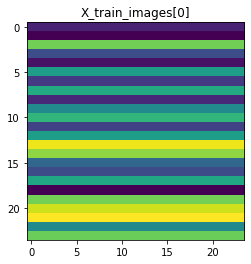

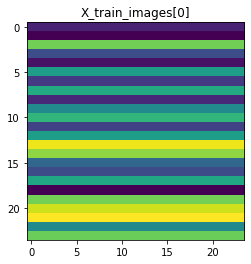

Saving normal images
Converting to gaf images


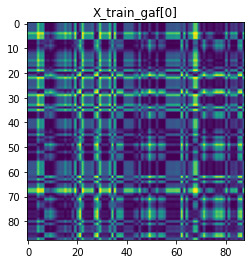

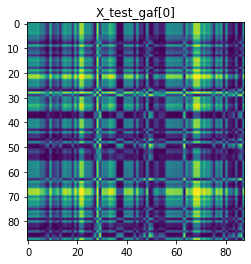

Saving gaf images
Converting to mtf images


/usr/local/lib/python3.7/dist-packages/pyts/preprocessing/discretizer.py:171: UserWarning: Some quantiles are equal. The number of bins will be smaller for sample [0 1]. Consider decreasing the number of bins or removing these samples.
  .format(samples))
/usr/local/lib/python3.7/dist-packages/pyts/preprocessing/discretizer.py:171: UserWarning: Some quantiles are equal. The number of bins will be smaller for sample [0 1]. Consider decreasing the number of bins or removing these samples.
  .format(samples))


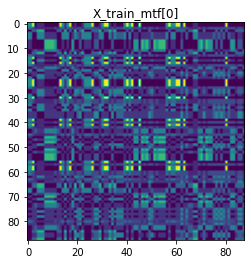

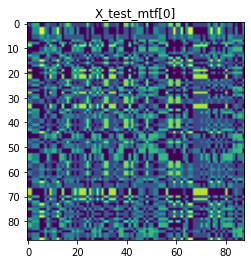

Saving mtf images


In [ ]:
split_data_and_save_images(data_ta_normalized, mid_prices_change_ls1, "midPrice/", "taNormalizedData/", "/labelingStrategy1/")

X_train.shape:  (1588, 88)
X_test.shape:  (397, 88)
y_train.shape:  (1588, 1)
y_test.shape:  (397, 1)
Converting to normal images


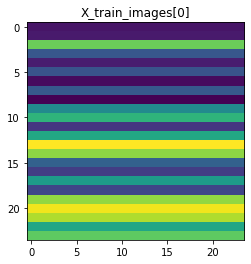

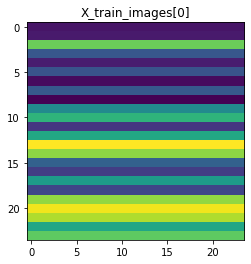

Saving normal images
Converting to gaf images


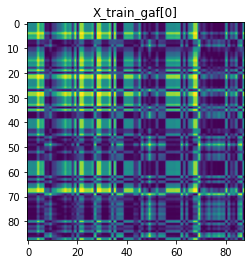

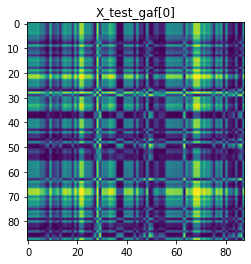

Saving gaf images
Converting to mtf images


/usr/local/lib/python3.7/dist-packages/pyts/preprocessing/discretizer.py:171: UserWarning: Some quantiles are equal. The number of bins will be smaller for sample [0 1]. Consider decreasing the number of bins or removing these samples.
  .format(samples))
/usr/local/lib/python3.7/dist-packages/pyts/preprocessing/discretizer.py:171: UserWarning: Some quantiles are equal. The number of bins will be smaller for sample [0 1]. Consider decreasing the number of bins or removing these samples.
  .format(samples))


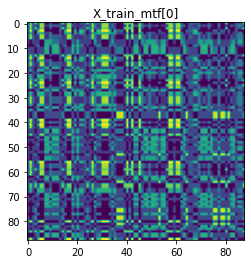

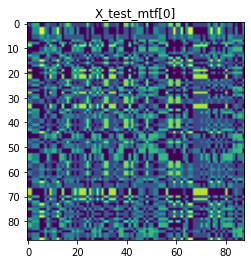

Saving mtf images


In [ ]:
split_data_and_save_images(data_ta_normalized, mid_prices_change_ls2, "midPrice/", "taNormalizedData/", "/labelingStrategy2/")

X_train.shape:  (1588, 88)
X_test.shape:  (398, 88)
y_train.shape:  (1588, 1)
y_test.shape:  (398, 1)
Converting to normal images


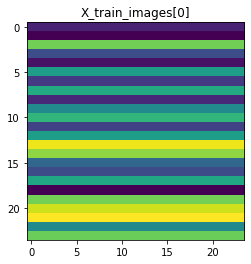

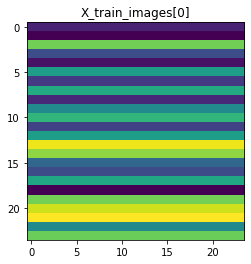

Saving normal images
Converting to gaf images


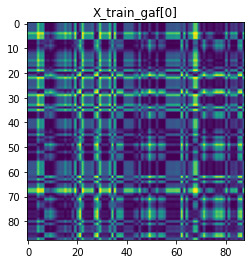

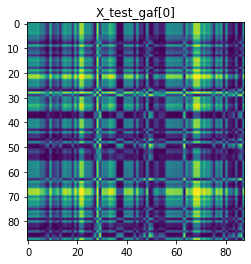

Saving gaf images
Converting to mtf images


/usr/local/lib/python3.7/dist-packages/pyts/preprocessing/discretizer.py:171: UserWarning: Some quantiles are equal. The number of bins will be smaller for sample [0 1]. Consider decreasing the number of bins or removing these samples.
  .format(samples))
/usr/local/lib/python3.7/dist-packages/pyts/preprocessing/discretizer.py:171: UserWarning: Some quantiles are equal. The number of bins will be smaller for sample [0 1]. Consider decreasing the number of bins or removing these samples.
  .format(samples))


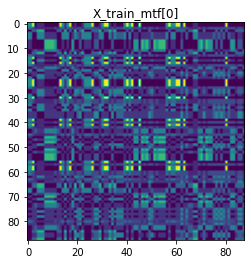

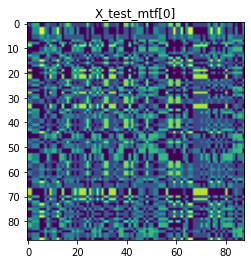

Saving mtf images


In [ ]:
split_data_and_save_images(data_ta_normalized, close_prices_change_ls1, "closePrice/", "taNormalizedData/", "/labelingStrategy1/")

X_train.shape:  (1588, 88)
X_test.shape:  (397, 88)
y_train.shape:  (1588, 1)
y_test.shape:  (397, 1)
Converting to normal images


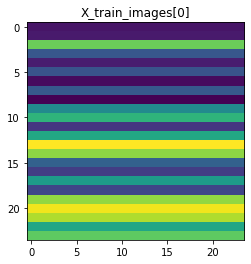

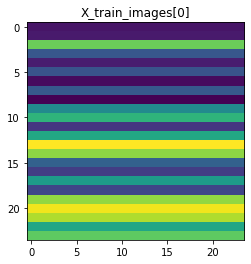

Saving normal images
Converting to gaf images


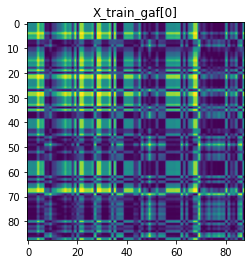

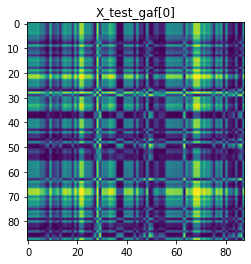

Saving gaf images
Converting to mtf images


/usr/local/lib/python3.7/dist-packages/pyts/preprocessing/discretizer.py:171: UserWarning: Some quantiles are equal. The number of bins will be smaller for sample [0 1]. Consider decreasing the number of bins or removing these samples.
  .format(samples))
/usr/local/lib/python3.7/dist-packages/pyts/preprocessing/discretizer.py:171: UserWarning: Some quantiles are equal. The number of bins will be smaller for sample [0 1]. Consider decreasing the number of bins or removing these samples.
  .format(samples))


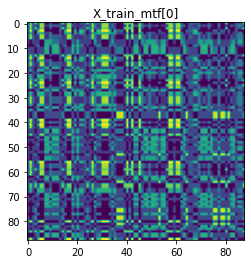

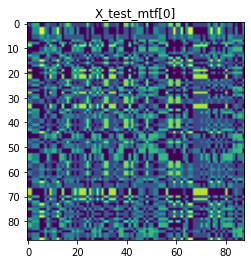

Saving mtf images


In [ ]:
split_data_and_save_images(data_ta_normalized, close_prices_change_ls2, "closePrice/", "taNormalizedData/", "/labelingStrategy2/")

X_train.shape:  (1588, 23)
X_test.shape:  (398, 23)
y_train.shape:  (1588, 1)
y_test.shape:  (398, 1)
Converting to normal images


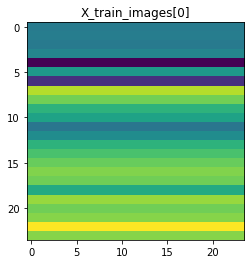

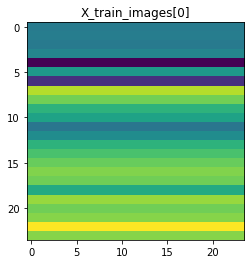

Saving normal images
Converting to gaf images


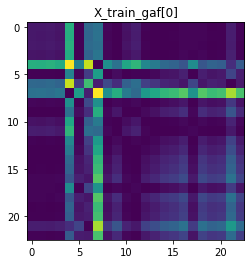

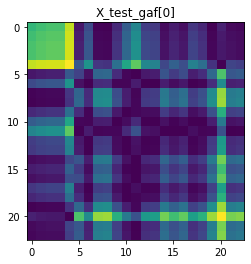

Saving gaf images
Converting to mtf images


/usr/local/lib/python3.7/dist-packages/pyts/preprocessing/discretizer.py:171: UserWarning: Some quantiles are equal. The number of bins will be smaller for sample [2 3]. Consider decreasing the number of bins or removing these samples.
  .format(samples))
/usr/local/lib/python3.7/dist-packages/pyts/preprocessing/discretizer.py:171: UserWarning: Some quantiles are equal. The number of bins will be smaller for sample [2]. Consider decreasing the number of bins or removing these samples.
  .format(samples))


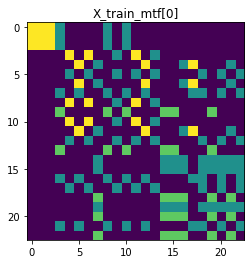

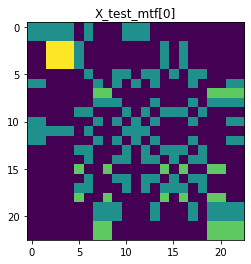

Saving mtf images


In [ ]:
split_data_and_save_images(data_pca_normalized, mid_prices_change_ls1, "midPrice/", "pcaNormalizedData/", "/labelingStrategy1/")

X_train.shape:  (1588, 23)
X_test.shape:  (397, 23)
y_train.shape:  (1588, 1)
y_test.shape:  (397, 1)
Converting to normal images


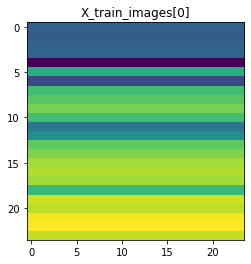

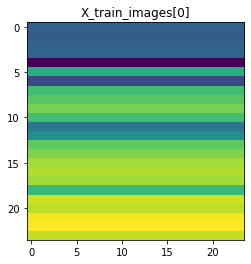

Saving normal images
Converting to gaf images


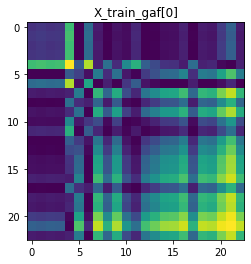

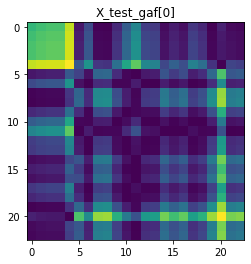

Saving gaf images
Converting to mtf images


/usr/local/lib/python3.7/dist-packages/pyts/preprocessing/discretizer.py:171: UserWarning: Some quantiles are equal. The number of bins will be smaller for sample [2]. Consider decreasing the number of bins or removing these samples.
  .format(samples))
/usr/local/lib/python3.7/dist-packages/pyts/preprocessing/discretizer.py:171: UserWarning: Some quantiles are equal. The number of bins will be smaller for sample [2 3]. Consider decreasing the number of bins or removing these samples.
  .format(samples))


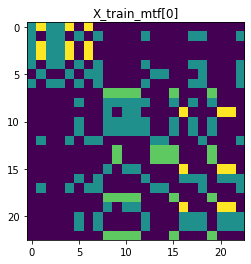

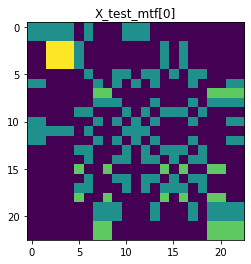

Saving mtf images


In [ ]:
split_data_and_save_images(data_pca_normalized, mid_prices_change_ls2, "midPrice/", "pcaNormalizedData/", "/labelingStrategy2/")

X_train.shape:  (1588, 23)
X_test.shape:  (398, 23)
y_train.shape:  (1588, 1)
y_test.shape:  (398, 1)
Converting to normal images


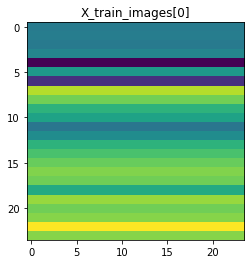

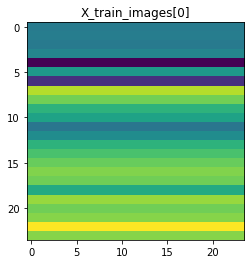

Saving normal images
Converting to gaf images


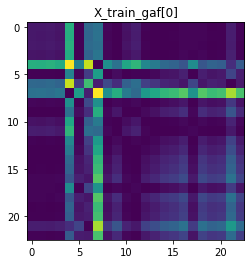

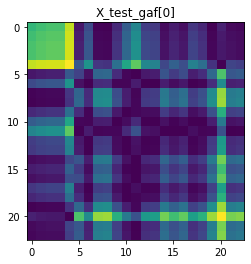

Saving gaf images
Converting to mtf images


/usr/local/lib/python3.7/dist-packages/pyts/preprocessing/discretizer.py:171: UserWarning: Some quantiles are equal. The number of bins will be smaller for sample [2 3]. Consider decreasing the number of bins or removing these samples.
  .format(samples))
/usr/local/lib/python3.7/dist-packages/pyts/preprocessing/discretizer.py:171: UserWarning: Some quantiles are equal. The number of bins will be smaller for sample [2]. Consider decreasing the number of bins or removing these samples.
  .format(samples))


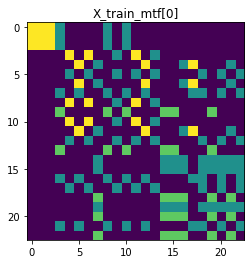

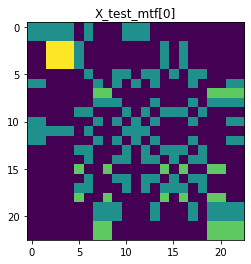

Saving mtf images


In [ ]:
split_data_and_save_images(data_pca_normalized, close_prices_change_ls1, "closePrice/", "pcaNormalizedData/", "/labelingStrategy1/")

X_train.shape:  (1588, 23)
X_test.shape:  (397, 23)
y_train.shape:  (1588, 1)
y_test.shape:  (397, 1)
Converting to normal images


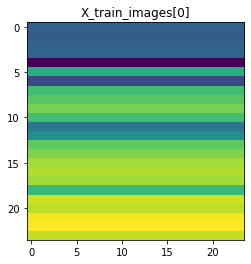

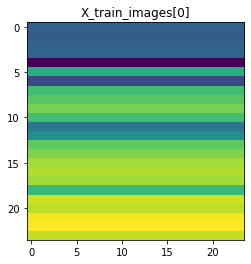

Saving normal images
Converting to gaf images


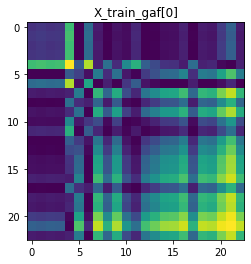

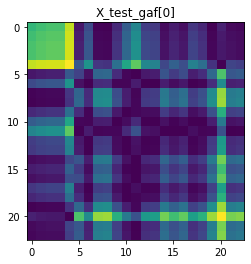

Saving gaf images
Converting to mtf images


/usr/local/lib/python3.7/dist-packages/pyts/preprocessing/discretizer.py:171: UserWarning: Some quantiles are equal. The number of bins will be smaller for sample [2]. Consider decreasing the number of bins or removing these samples.
  .format(samples))
/usr/local/lib/python3.7/dist-packages/pyts/preprocessing/discretizer.py:171: UserWarning: Some quantiles are equal. The number of bins will be smaller for sample [2 3]. Consider decreasing the number of bins or removing these samples.
  .format(samples))


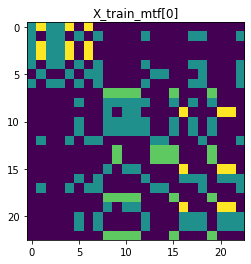

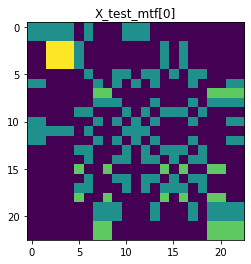

Saving mtf images


In [ ]:
split_data_and_save_images(data_pca_normalized, close_prices_change_ls2, "closePrice/", "pcaNormalizedData/", "/labelingStrategy2/")

In [ ]:
def select_k_best_ta(df, label):
  data = df
  data["label"] = label
  data = data.dropna()
  y = data.iloc[:,-1:].values
  data_main = data.iloc[:, 0:5]
  X = data.iloc[:, 5 : -1]
  selected_X = pd.DataFrame(np.uint8(SelectKBest(chi2, k=30).fit_transform(X, y)))
  #below line needs to be run only in case of labeling strategy 2
  #selected_X.index = range(1, selected_X.shape[0] + 1)
  data = pd.concat([data_main, selected_X], axis=1, join='inner')
  return data, y

In [ ]:
data_kbest_ta_normalized_mid1, mid_prices_change_ls1_kbest = select_k_best_ta(data_ta_normalized, mid_prices_change_ls1)
data_kbest_ta_normalized_mid2, mid_prices_change_ls2_kbest = select_k_best_ta(data_ta_normalized, mid_prices_change_ls2)
data_kbest_ta_normalized_close1, close_prices_change_ls1_kbest = select_k_best_ta(data_ta_normalized, close_prices_change_ls1)
data_kbest_ta_normalized_close2, close_prices_change_ls2_kbest = select_k_best_ta(data_ta_normalized, close_prices_change_ls2)

X_train.shape:  (1588, 35)
X_test.shape:  (398, 35)
y_train.shape:  (1588, 1)
y_test.shape:  (398, 1)
Converting to normal images


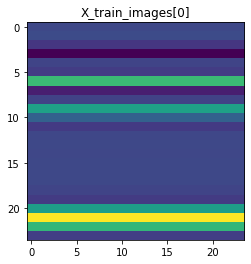

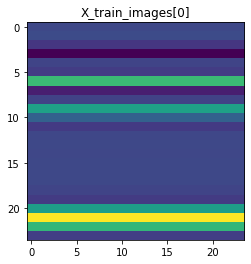

Saving normal images
Converting to gaf images


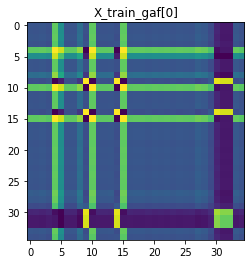

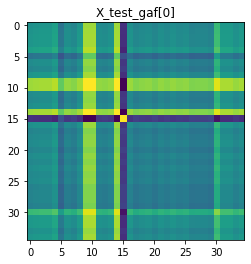

Saving gaf images
Converting to mtf images


/usr/local/lib/python3.7/dist-packages/pyts/preprocessing/discretizer.py:171: UserWarning: Some quantiles are equal. The number of bins will be smaller for sample [0 1 2 3 4 5]. Consider decreasing the number of bins or removing these samples.
  .format(samples))
/usr/local/lib/python3.7/dist-packages/pyts/preprocessing/discretizer.py:171: UserWarning: Some quantiles are equal. The number of bins will be smaller for sample [0 1 2 3 4 5]. Consider decreasing the number of bins or removing these samples.
  .format(samples))


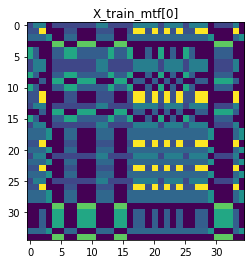

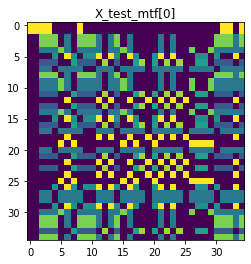

Saving mtf images


In [ ]:
split_data_and_save_images(data_kbest_ta_normalized_mid1, mid_prices_change_ls1_kbest, "midPrice/", "kBestTaNormalizedData/", "/labelingStrategy1/")

X_train.shape:  (1588, 35)
X_test.shape:  (397, 35)
y_train.shape:  (1588, 1)
y_test.shape:  (397, 1)
Converting to normal images


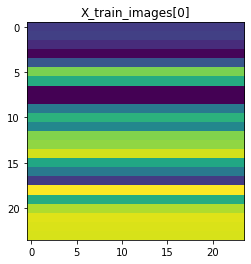

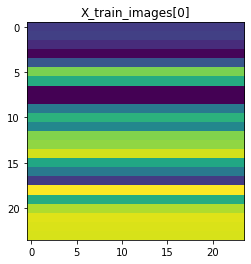

Saving normal images
Converting to gaf images


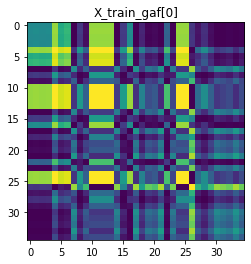

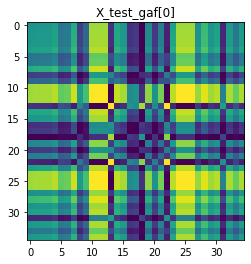

Saving gaf images
Converting to mtf images


/usr/local/lib/python3.7/dist-packages/pyts/preprocessing/discretizer.py:171: UserWarning: Some quantiles are equal. The number of bins will be smaller for sample [0 1 2]. Consider decreasing the number of bins or removing these samples.
  .format(samples))
/usr/local/lib/python3.7/dist-packages/pyts/preprocessing/discretizer.py:171: UserWarning: Some quantiles are equal. The number of bins will be smaller for sample [0]. Consider decreasing the number of bins or removing these samples.
  .format(samples))


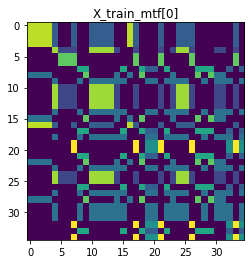

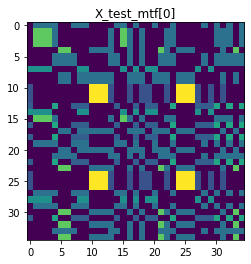

Saving mtf images


In [ ]:
split_data_and_save_images(data_kbest_ta_normalized_mid2, mid_prices_change_ls2_kbest, "midPrice/", "kBestTaNormalizedData/", "/labelingStrategy2/")

X_train.shape:  (1588, 35)
X_test.shape:  (398, 35)
y_train.shape:  (1588, 1)
y_test.shape:  (398, 1)
Converting to normal images


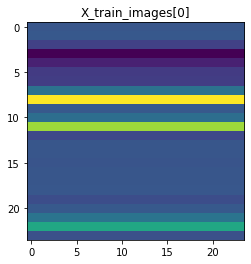

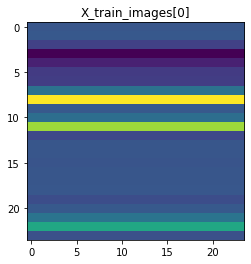

Saving normal images
Converting to gaf images


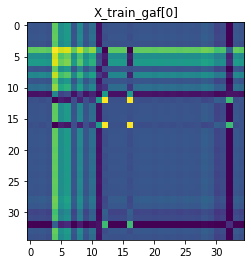

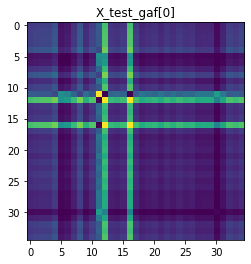

Saving gaf images
Converting to mtf images


/usr/local/lib/python3.7/dist-packages/pyts/preprocessing/discretizer.py:171: UserWarning: Some quantiles are equal. The number of bins will be smaller for sample [0 1 2 3 4 5]. Consider decreasing the number of bins or removing these samples.
  .format(samples))
/usr/local/lib/python3.7/dist-packages/pyts/preprocessing/discretizer.py:171: UserWarning: Some quantiles are equal. The number of bins will be smaller for sample [0 1 2 3 4 5]. Consider decreasing the number of bins or removing these samples.
  .format(samples))


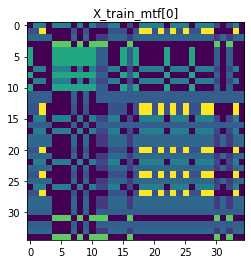

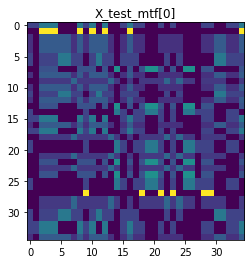

Saving mtf images


In [ ]:
split_data_and_save_images(data_kbest_ta_normalized_close1, close_prices_change_ls1_kbest, "closePrice/", "kBestTaNormalizedData/", "/labelingStrategy1/")

X_train.shape:  (1588, 35)
X_test.shape:  (397, 35)
y_train.shape:  (1588, 1)
y_test.shape:  (397, 1)
Converting to normal images


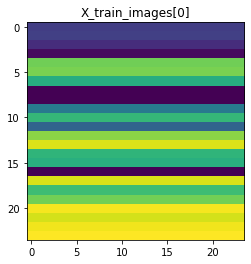

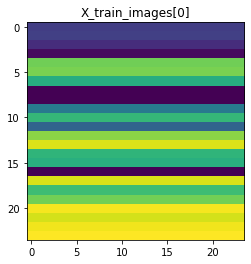

Saving normal images
Converting to gaf images


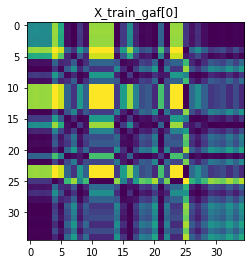

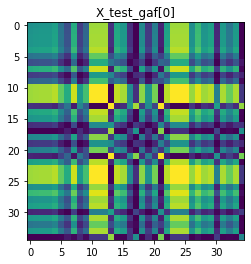

Saving gaf images
Converting to mtf images


/usr/local/lib/python3.7/dist-packages/pyts/preprocessing/discretizer.py:171: UserWarning: Some quantiles are equal. The number of bins will be smaller for sample [0 1 2]. Consider decreasing the number of bins or removing these samples.
  .format(samples))
/usr/local/lib/python3.7/dist-packages/pyts/preprocessing/discretizer.py:171: UserWarning: Some quantiles are equal. The number of bins will be smaller for sample [0]. Consider decreasing the number of bins or removing these samples.
  .format(samples))


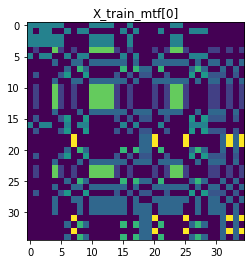

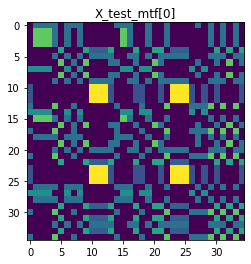

Saving mtf images


In [ ]:
split_data_and_save_images(data_kbest_ta_normalized_close2, close_prices_change_ls2_kbest, "closePrice/", "kBestTaNormalizedData/", "/labelingStrategy2/")